# Red Wine Quality Prediction Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
wine_df = pd.read_csv(r'winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
wine_df.shape

(1599, 12)

In [33]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

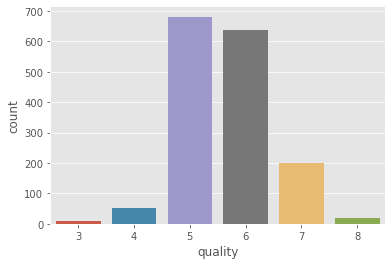

In [37]:
style.use('ggplot')
sns.countplot(wine_df['quality'])

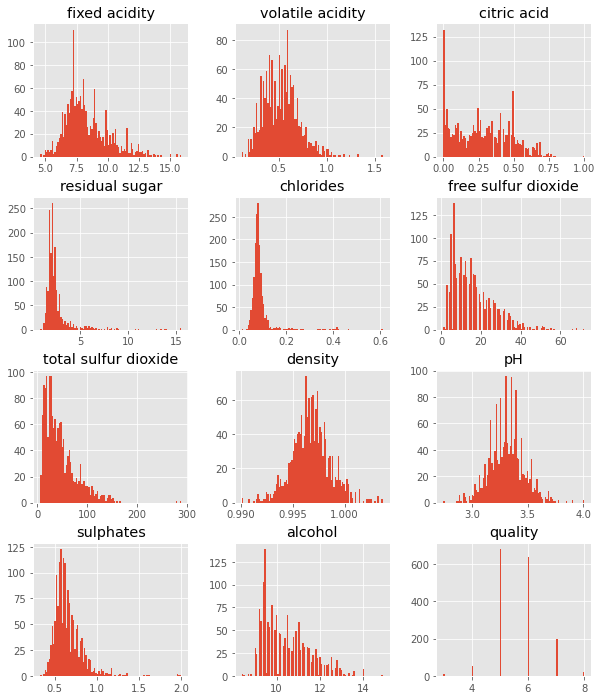

In [38]:
wine_df.hist(bins=100, figsize=(10,12))
plt.show()

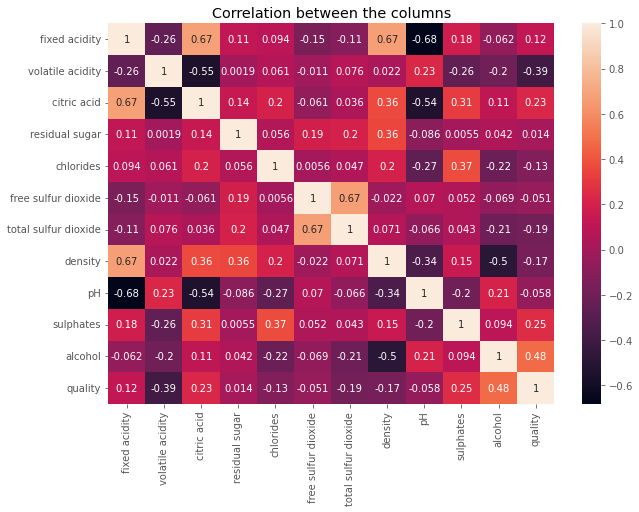

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [40]:
wine_df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

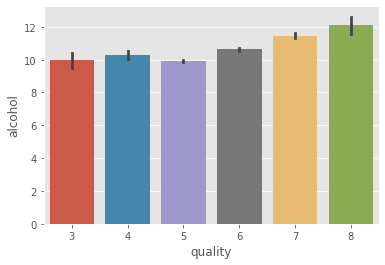

In [41]:
sns.barplot(wine_df['quality'], wine_df['alcohol'])

In [42]:
#wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)

In [47]:
wine_df[wine_df['quality']>=7]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [48]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [51]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 54.58%


In [53]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.60      0.72      0.65       195
           6       0.50      0.60      0.55       200
           7       0.25      0.02      0.03        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.22      0.22      0.21       480
weighted avg       0.48      0.55      0.50       480



TN:  0
FN:  0
TP:  0
FP:  0


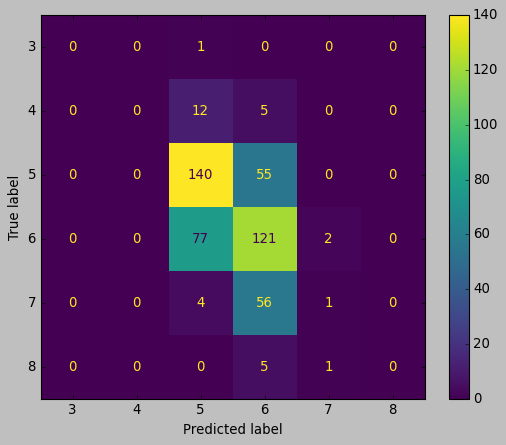

In [54]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [55]:
#Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 57.71%


In [56]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.06      0.06        17
           5       0.65      0.65      0.65       195
           6       0.58      0.60      0.59       200
           7       0.49      0.48      0.48        61
           8       0.25      0.17      0.20         6

    accuracy                           0.58       480
   macro avg       0.34      0.32      0.33       480
weighted avg       0.58      0.58      0.58       480



TN:  0
FN:  0
TP:  1
FP:  0


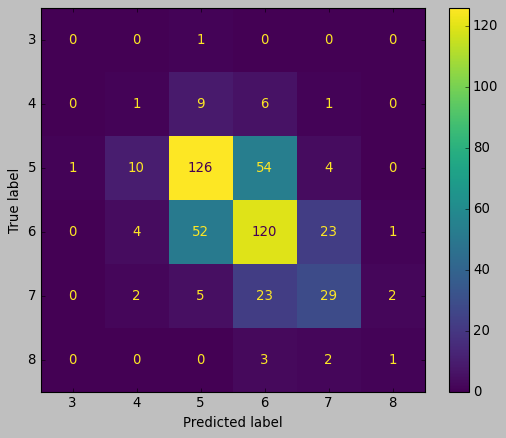

In [57]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [58]:
# Random Forest
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 66.67%


In [59]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.73      0.78      0.75       195
           6       0.63      0.70      0.66       200
           7       0.60      0.44      0.51        61
           8       0.33      0.17      0.22         6

    accuracy                           0.67       480
   macro avg       0.38      0.35      0.36       480
weighted avg       0.64      0.67      0.65       480



TN:  0
FN:  0
TP:  0
FP:  0


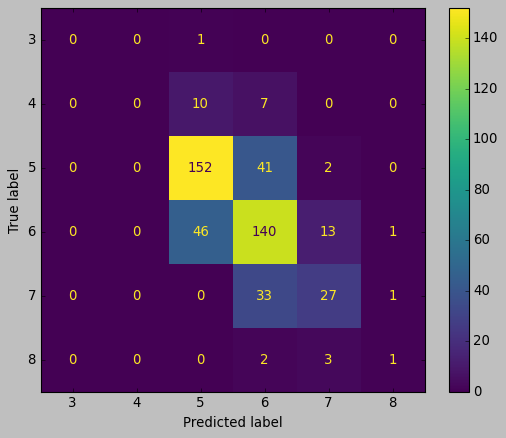

In [60]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

# Medical Cost Personal Insurance Project

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LinearRegration     Spelling Mistek
from sklearn.linear_model import LinearRegression


#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegration

In [37]:
df = pd.read_csv(r'medical_cost_insurance.csv')

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.shape

(1338, 7)

In [40]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [42]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


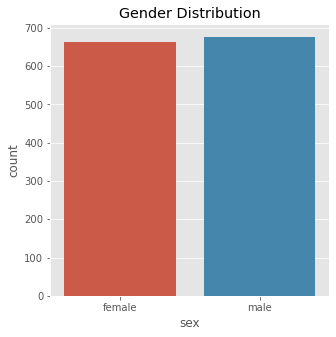

In [44]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x="sex",data=df)
plt.title('Gender Distribution')
plt.show()

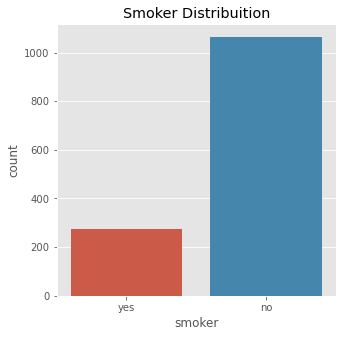

In [45]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='smoker',data=df)
plt.title('Smoker Distribuition')
plt.show()

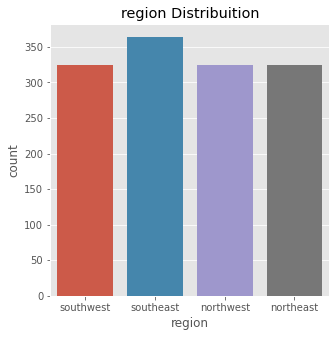

In [46]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='region',data=df)
plt.title('region Distribuition')
plt.show()

Text(0.5, 1.0, 'Cost Vs Region')

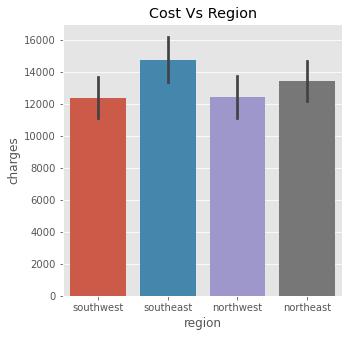

In [47]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=df)
plt.title('Cost Vs Region')


Text(0.5, 1.0, 'Smoker Vs Charges')

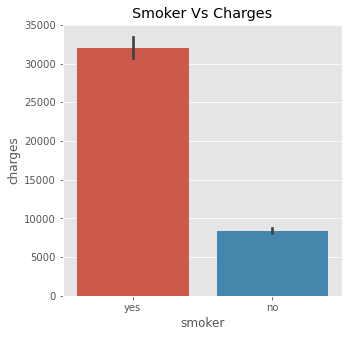

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(x='smoker',y='charges',data=df)
plt.title('Smoker Vs Charges')

Text(0.5, 1.0, 'Smoker Vs Charges')

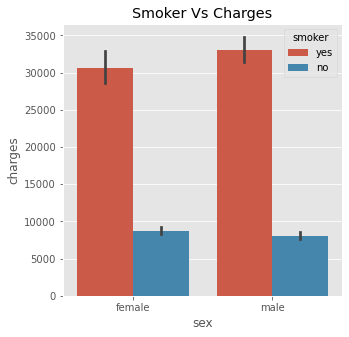

In [49]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=df)
plt.title('Smoker Vs Charges')

<AxesSubplot:xlabel='region', ylabel='charges'>

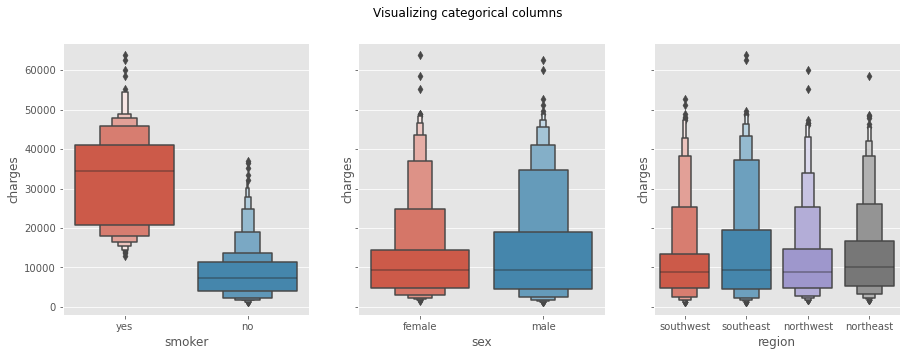

In [50]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker',y='charges',data=df,ax=axes[0])
sns.boxenplot(x='sex',y='charges',data=df,ax=axes[1])
sns.boxenplot(x='region',y='charges',data=df,ax=axes[2])


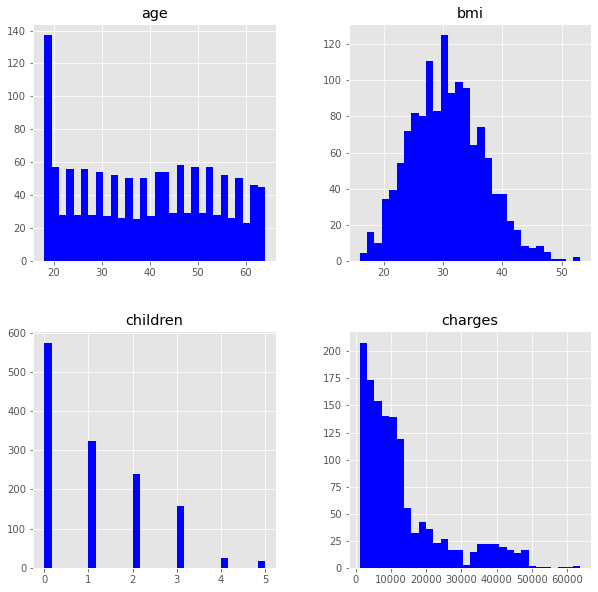

In [51]:
df[['age','bmi','children','charges']].hist(bins=30,figsize=(10,10),color='blue')
plt.show()

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df['sex']=df['sex'].apply({'male':0,'female':1}.get)
df['smoker']=df['smoker'].apply({'yes':1,'no':0}.get)
df['region']=df['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)


In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


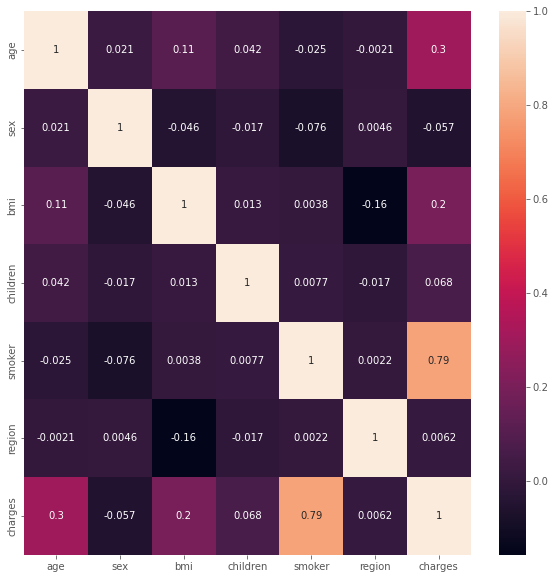

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [56]:
x=df.drop(['charges','sex'],axis=1)
y=df.charges

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (936, 5)
x_test shape:  (402, 5)
y_train Shape:  (936,)
y_test shape:  (402,)


In [58]:
#from sklearn.linear_model import LinearRegration    Spelling Mistek
#linreg=LinearRegression()
#pip uninstall scikit-learn
#$ pip3 install scikit-learn

In [59]:
#exit()


In [60]:
#$ pip install scikit-learn
    

In [61]:
#pytest sklearn

In [62]:
#pip install -U scikit-learn

In [63]:
linreg=LinearRegression()

In [65]:
linreg.fit(x_train,y_train)
pred=linreg.predict(x_test)

In [66]:
from sklearn.metrics import r2_score
print("R2 Score: ", r2_score(y_test,pred))

R2 Score:  0.7697211527941854


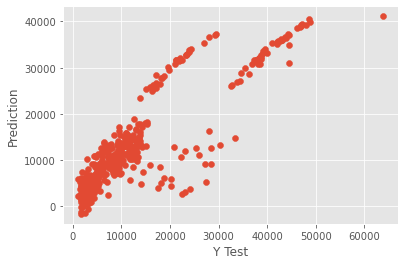

In [67]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

In [68]:
data= {'age':50, 'bmi':25, 'children':2, 'smoker':0,'region':2}
index =[0]
cust_df=pd.DataFrame(data,index)

In [69]:
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [71]:
cost_pred=linreg.predict(cust_df)
print("The Medical costfor new customer is ", cost_pred)

The Medical costfor new customer is  [9579.86504857]


### hi amit 